In [37]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [38]:
INFILE = '/Users/zachtsouprakos/documents/msds/msds-422/hmeq_module1.csv'

TARGET_F = 'TARGET_BAD_FLAG'
TARGET_A = 'TARGET_LOSS_AMT'

df = pd.read_csv(INFILE)

X = df.copy()
X = X.drop([TARGET_A, TARGET_F, 'MORTDUE','VALUE' ,'REASON' ,'JOB', 'Unnamed: 0', 'YOJ', 'DEROG', 'DELINQ', 'DELINQ',
           'CLAGE', 'NINQ', 'CLNO', 'DEBTINC', 'IMP_REASON', 'IMP_JOB'], axis = 1)
varNames = X.columns

In [49]:
df.head()

,Unnamed: 0,TARGET_BAD_FLAG,TARGET_LOSS_AMT,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,...,M_DEBTINC,IMP_DEBTINC,z_REASON_DebtCon,z_REASON_HomeImp,z_JOB_Mgr,z_JOB_Office,z_JOB_Other,z_JOB_ProfExe,z_JOB_Sales,z_JOB_Self
0,0,1,641.0,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,...,1,34.818262,0,1,0,0,1,0,0,0
1,1,1,1109.0,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,...,1,34.818262,0,1,0,0,1,0,0,0
2,2,1,767.0,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,...,1,34.818262,0,1,0,0,1,0,0,0
3,3,1,1425.0,1500,NaN,NaN,NaN,NaN,NaN,NaN,...,1,34.818262,0,0,0,0,0,0,0,0
4,4,0,NaN,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,...,1,34.818262,0,1,0,1,0,0,0,0


In [39]:
X.head()

,LOAN,M_MORTDUE,IMP_MORTDUE,M_VALUE,IMP_VALUE,M_YOJ,IMP_YOJ,M_DEROG,IMP_DEROG,M_DELINQ,...,M_DEBTINC,IMP_DEBTINC,z_REASON_DebtCon,z_REASON_HomeImp,z_JOB_Mgr,z_JOB_Office,z_JOB_Other,z_JOB_ProfExe,z_JOB_Sales,z_JOB_Self
0,1100,0,25860.0,0,39025.0,0,10.5,0,0.0,0,...,1,34.818262,0,1,0,0,1,0,0,0
1,1300,0,70053.0,0,68400.0,0,7.0,0,0.0,0,...,1,34.818262,0,1,0,0,1,0,0,0
2,1500,0,13500.0,0,16700.0,0,4.0,0,0.0,0,...,1,34.818262,0,1,0,0,1,0,0,0
3,1500,1,65019.0,1,89235.5,1,7.0,1,0.0,1,...,1,34.818262,0,0,0,0,0,0,0,0
4,1700,0,97800.0,0,112000.0,0,3.0,0,0.0,0,...,1,34.818262,0,1,0,1,0,0,0,0


### Standardize the data

In [40]:
theScaler = StandardScaler()
theScaler.fit(X)

# Now we need to standardize the data set
X_STD = theScaler.transform(X)
X_STD[0:5]

array([[-1.5622993 , -0.30852163, -1.10791953, -0.1383902 , -1.09937141,
        -0.30754217,  0.24023673, -0.36715908, -0.28097618, -0.32833929,
        -0.37594296, -0.23343947, -1.01802579, -0.30590518, -0.10287928,
        -0.19669631, -1.23087808,  1.92458444,  0.10696269, -1.39034919,
         1.53242116, -0.38431605, -0.43490924,  1.22303409, -0.52193557,
        -0.13648917, -0.1829379 ],
       [-1.54445258, -0.30852163, -0.06928555, -0.1383902 , -0.58279403,
        -0.30754217, -0.24193566, -0.36715908, -0.28097618, -0.32833929,
         1.47734078, -0.23343947, -0.68935009, -0.30590518, -0.70757403,
        -0.19669631, -0.72838939,  1.92458444,  0.10696269, -1.39034919,
         1.53242116, -0.38431605, -0.43490924,  1.22303409, -0.52193557,
        -0.13648917, -0.1829379 ],
       [-1.52660585, -0.30852163, -1.39840707, -0.1383902 , -1.49197022,
        -0.30754217, -0.65522627, -0.36715908, -0.28097618, -0.32833929,
        -0.37594296, -0.23343947, -0.35868001, -0.3059

### Principal Component Analysis

In [41]:
# Count the number of variables
MAX_N = X_STD.shape[1]

#Fit the data to PCA by creating a PCA for each variable
pca = PCA(n_components=MAX_N)
pca.fit(X_STD)

# Now lets look at the eigen vectors for each PCA
ev = pca.explained_variance_
print("Eigen Values")
print(ev)
print('\n\n')

Eigen Values
[3.9255     2.55175406 2.07628739 1.66480932 1.44763214 1.30611727
 1.25199279 1.17373441 1.13974427 1.08047656 0.97936338 0.93602562
 0.87159193 0.83386297 0.81934669 0.78310907 0.7700231  0.69486077
 0.62289485 0.59509614 0.56350787 0.31184881 0.18445717 0.17124822
 0.12975387 0.08057934 0.03891295]





In [42]:
varPCT = []
totPCT = []
total = 0
for i in ev:
    total = total + i
    VAR = int( i / len(ev) * 100)
    PCT = int (total / len(ev) * 100)
    varPCT.append(VAR)
    totPCT.append(PCT)
    print( round(i,2), 'variation =', VAR,"%"," total=", PCT,"%")

3.93 variation = 14 %  total= 14 %
2.55 variation = 9 %  total= 23 %
2.08 variation = 7 %  total= 31 %
1.66 variation = 6 %  total= 37 %
1.45 variation = 5 %  total= 43 %
1.31 variation = 4 %  total= 48 %
1.25 variation = 4 %  total= 52 %
1.17 variation = 4 %  total= 57 %
1.14 variation = 4 %  total= 61 %
1.08 variation = 4 %  total= 65 %
0.98 variation = 3 %  total= 68 %
0.94 variation = 3 %  total= 72 %
0.87 variation = 3 %  total= 75 %
0.83 variation = 3 %  total= 78 %
0.82 variation = 3 %  total= 81 %
0.78 variation = 2 %  total= 84 %
0.77 variation = 2 %  total= 87 %
0.69 variation = 2 %  total= 90 %
0.62 variation = 2 %  total= 92 %
0.6 variation = 2 %  total= 94 %
0.56 variation = 2 %  total= 96 %
0.31 variation = 1 %  total= 97 %
0.18 variation = 0 %  total= 98 %
0.17 variation = 0 %  total= 99 %
0.13 variation = 0 %  total= 99 %
0.08 variation = 0 %  total= 99 %
0.04 variation = 0 %  total= 100 %


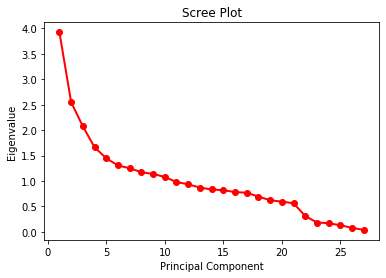

In [43]:
# Scree plot
PC_NUM = np.arange(MAX_N) + 1
plt.plot(PC_NUM, ev, 'ro-', linewidth = 2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

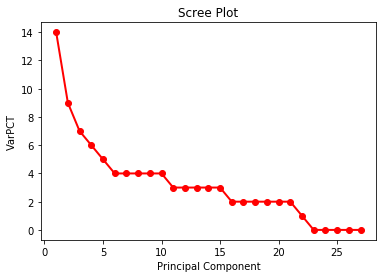

In [44]:
# additional scree plot
PC_NUM = np.arange(MAX_N) + 1
plt.plot(PC_NUM, varPCT, 'ro-', linewidth = 2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('VarPCT')
plt.show()

In [45]:
dfc = pd.DataFrame( pca.components_)
dfc.columns = varNames
dfc.head()

,LOAN,M_MORTDUE,IMP_MORTDUE,M_VALUE,IMP_VALUE,M_YOJ,IMP_YOJ,M_DEROG,IMP_DEROG,M_DELINQ,...,M_DEBTINC,IMP_DEBTINC,z_REASON_DebtCon,z_REASON_HomeImp,z_JOB_Mgr,z_JOB_Office,z_JOB_Other,z_JOB_ProfExe,z_JOB_Sales,z_JOB_Self
0,-0.085290,0.218725,-0.095716,0.049499,-0.123312,0.242005,-0.055975,0.369620,-0.023705,0.417563,...,-0.000030,-0.082959,-0.108178,0.036809,-0.029642,-0.030293,0.034480,-0.097587,-0.021890,-0.018835
1,0.222035,-0.123620,0.483655,-0.007621,0.480096,-0.026755,-0.022782,0.166390,-0.058824,0.131150,...,-0.074607,0.098899,0.128898,-0.143112,0.095797,-0.035108,-0.318467,0.263259,0.027343,0.095675
2,-0.062640,0.111446,0.117006,-0.017583,0.150291,-0.005523,0.085141,-0.091370,-0.093343,-0.077566,...,-0.055944,-0.113137,-0.604017,0.605726,-0.102340,0.034034,-0.139623,0.168735,-0.056417,0.148643
3,-0.106945,-0.037051,0.040818,0.316736,0.010054,-0.073809,-0.066119,0.045657,0.393958,0.008579,...,0.489901,0.180236,-0.177296,0.173526,0.162517,-0.102884,-0.021146,-0.056007,0.001170,0.116943
4,0.381547,0.210129,0.162950,-0.014176,0.200816,0.294562,0.075614,-0.079643,0.089601,-0.008277,...,-0.031853,0.116509,-0.030792,0.028107,-0.145838,-0.438443,0.537234,-0.178602,-0.052606,0.205867


In [46]:
X_PCA = pca.transform( X_STD )
X_PCA = pd.DataFrame(X_PCA)

# Lets drop the last two PCAs because they don't do much
# Give me all the rows, and just keep columns 0 through 1
X_PCA = X_PCA.iloc[:,0:14]
colNames = X_PCA.columns
PCA_COLs = []
for i in colNames:
    index = int(i) + 1
    theName = 'PC_' + str(index)
    PCA_COLs.append(theName)


X_PCA.columns = PCA_COLs
X_PCA.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14
0,0.141747,-3.220423,1.207073,1.103250,-0.117954,0.182571,-0.786798,1.290376,-0.123168,-0.263534,0.715516,0.719502,-0.501550,0.055602
1,-0.157967,-2.246576,1.468603,1.875001,-0.075554,-0.245351,-0.504689,1.077063,0.348034,-0.080417,0.492592,0.936005,0.708848,0.218656
2,0.237383,-3.378218,1.140727,1.077963,-0.237989,0.196927,-0.834892,1.309975,0.163996,-0.041440,0.484382,0.464643,-0.056413,0.273341
3,9.677034,1.100851,0.073044,3.289754,-0.174661,-1.620091,-0.477247,-3.288734,0.513340,0.274612,0.698197,4.360040,-0.151198,0.156509
4,-0.318502,-1.054321,1.996190,0.917439,-2.037513,1.793923,-0.210306,-0.086532,1.047082,-0.167939,-0.367273,1.193670,-0.465553,0.207275


In [50]:
# TARGET_F = 'TARGET_BAD_FLAG'
# TARGET_A = 'TARGET_LOSS_AMT'

X_PCA['TARGET_BAD_FLAG'] = df[TARGET_F]
X_PCA['TARGET_LOSS_AMT'] = df[TARGET_A]
X_PCA['IMP_REASON'] = df['IMP_REASON']
X_PCA['IMP_JOB'] = df['IMP_JOB']

In [63]:
X_PCA.head().T
PCA_COLs

['PC_1',
 'PC_2',
 'PC_3',
 'PC_4',
 'PC_5',
 'PC_6',
 'PC_7',
 'PC_8',
 'PC_9',
 'PC_10',
 'PC_11',
 'PC_12',
 'PC_13',
 'PC_14']

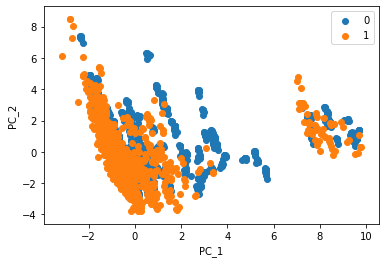

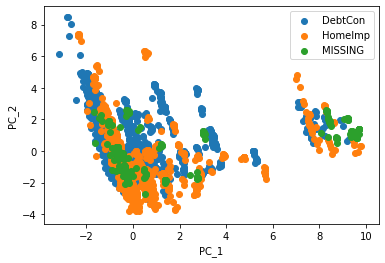

In [91]:
for Name, Group in X_PCA.groupby(TARGET_F):
    plt.scatter(Group.PC_1, Group.PC_2, label = Name)
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.legend()
plt.show()

for Name, Group in X_PCA.groupby('IMP_REASON'):
    plt.scatter(Group.PC_1, Group.PC_2, label = Name)
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.legend()
plt.show()

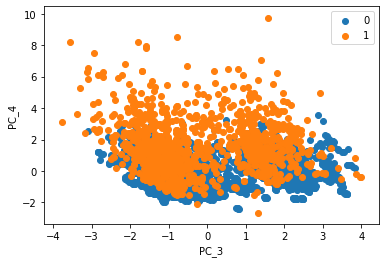

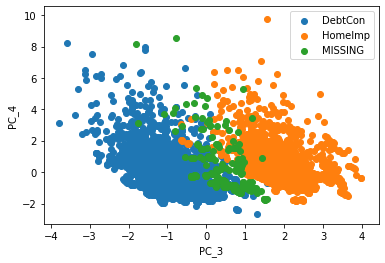

In [92]:
for Name, Group in X_PCA.groupby(TARGET_F):
    plt.scatter(Group.PC_3, Group.PC_4, label = Name)
plt.xlabel('PC_3')
plt.ylabel('PC_4')
plt.legend()
plt.show()

for Name, Group in X_PCA.groupby('IMP_REASON'):
    plt.scatter(Group.PC_3, Group.PC_4, label = Name)
plt.xlabel('PC_3')
plt.ylabel('PC_4')
plt.legend()
plt.show()

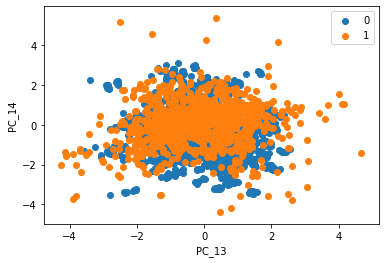

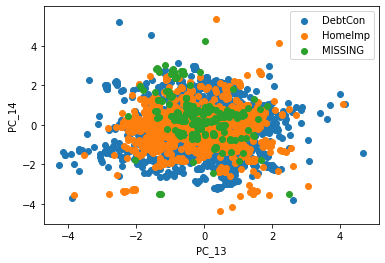

In [93]:
for Name, Group in X_PCA.groupby(TARGET_F):
    plt.scatter(Group.PC_13, Group.PC_14, label = Name)
plt.xlabel('PC_13')
plt.ylabel('PC_14')
plt.legend()
plt.show()

for Name, Group in X_PCA.groupby('IMP_REASON'):
    plt.scatter(Group.PC_13, Group.PC_14, label = Name)
plt.xlabel('PC_13')
plt.ylabel('PC_14')
plt.legend()
plt.show()

## Outstanding Questions
1. How do we know how many variables are enough? I know that we utilize eigen vectors and a scree visual, but what is an appropriate percentage of data?
    This data has many more variables compared to the example in the lecture so the distribution representative data spreads much farther across the variables
2. By focusing solely on one PCA, how can we draw correlation? What story can one PCA tell us about this data set?
3. Leveraging PCA has shown me how useful it really is, especially where it might be hard to tell a story with complicated data sets. If PCA doesn't tell a story, what else can we use?